# 🧠 Praktikum Deep Learning: MLP untuk Regresi & Klasifikasi dengan PyTorch di Google Colab!

## Persiapan Library Pytorch di Google Colab

In [1]:
# Import semua alat yang kita butuhkan
import torch  # Library utama buat deep learning
import torch.nn as nn  # Bikin model jaringan saraf
import torch.optim as optim  # Optimizer buat update bobot model
import torch.nn.functional as F  # Aktivasi & fungsi tambahan
import numpy as np  # Bantu operasi matematika
import matplotlib.pyplot as plt  # Buat visualisasi data
from sklearn.model_selection import train_test_split  # Pisah dataset jadi training & testing
from sklearn.preprocessing import StandardScaler  # Normalisasi data
from sklearn.datasets import make_regression, make_classification  # Bikin dataset dummy
from torch.utils.data import DataLoader, TensorDataset  # Manajemen dataset di PyTorch

## 📌 Bagian 1: MLP untuk Regresi (Prediksi Angka)

### Membuat Dataset untuk Regresi

In [2]:
# Buat dataset regresi (prediksi angka)
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)
y = y.reshape(-1, 1)  # Ubah ke bentuk kolom biar sesuai format PyTorch

# Pisah dataset jadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar skalanya seragam
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke format tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Masukkan ke DataLoader supaya lebih gampang di-training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

### Membangun Model MLP untuk Regresi

In [3]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.hidden1 = nn.Linear(5, 32)  # Layer pertama: input 5 fitur, output 32 neuron
        self.hidden2 = nn.Linear(32, 16) # Layer kedua: dari 32 neuron ke 16 neuron
        self.output = nn.Linear(16, 1)   # Layer terakhir: hasilkan 1 angka (prediksi)

    def forward(self, x):
        x = F.relu(self.hidden1(x))  # Aktivasi ReLU di hidden layer 1
        x = F.relu(self.hidden2(x))  # Aktivasi ReLU di hidden layer 2
        x = self.output(x)  # Output akhir tanpa aktivasi (karena regresi)
        return x

# Buat model
model = MLPRegression()

### Training Model (Mengajarkan Model!)

In [4]:
criterion = nn.MSELoss()  # Loss function buat regresi
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer Adam

# Training loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()   # Reset gradien biar nggak numpuk
        y_pred = model(X_batch) # Model memprediksi output
        loss = criterion(y_pred, y_batch)  # Hitung error
        loss.backward()  # Backpropagation buat update bobot
        optimizer.step()  # Update bobot berdasarkan loss

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 15745.4805
Epoch 10, Loss: 143.9608
Epoch 20, Loss: 82.8124
Epoch 30, Loss: 52.9694
Epoch 40, Loss: 62.8008
Epoch 50, Loss: 43.1809
Epoch 60, Loss: 73.2853
Epoch 70, Loss: 123.8989
Epoch 80, Loss: 80.4059
Epoch 90, Loss: 95.8513


### Evaluasi Model MLP untuk Regresi (Apakah Model Sudah Pintar?)

In [5]:
# Ubah ke mode evaluasi (supaya model nggak update bobot lagi)
model.eval()

# Matikan gradien supaya lebih hemat memori
with torch.no_grad():
    y_pred = model(X_test)  # Model memprediksi data testing
    test_loss = criterion(y_pred, y_test)  # Hitung error di data testing

print(f"Test Loss: {test_loss.item():.4f}")  # Cetak hasil error

Test Loss: 122.7795


### Visualisasi Hasil Regresi Model  

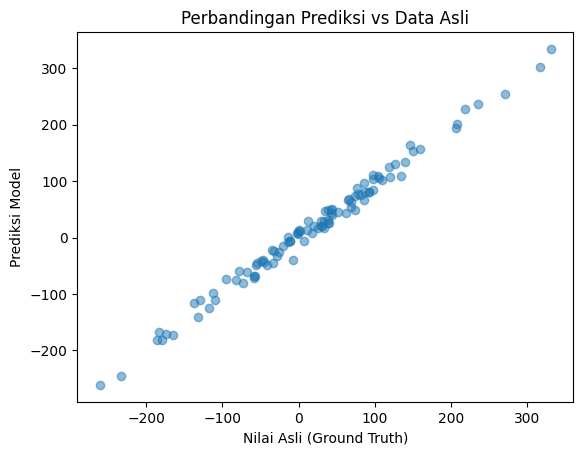

In [6]:
# Plot hasil prediksi vs data asli
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Asli (Ground Truth)")
plt.ylabel("Prediksi Model")
plt.title("Perbandingan Prediksi vs Data Asli")
plt.show()


Hasil Analisis Output:
Model regresi ini cukup akurat karena sebagian besar prediksi mendekati nilai asli, terlihat dari titik-titik yang mengikuti garis diagonal. Namun, masih ada beberapa error kecil yang bisa dikurangi dengan tuning hyperparameter atau dataset yang lebih baik. Secara keseluruhan, model sudah bekerja dengan baik tetapi masih bisa ditingkatkan.

## 📌 Bagian 2: MLP untuk Klasifikasi (Prediksi Kategori!)

### Siapkan Dataset Klasifikasi

In [7]:
# Buat dataset klasifikasi dummy (binary classification)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Pisah dataset jadi training & testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Masukkan ke DataLoader buat training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

### Membangun Model MLP untuk Klasifikasi

In [8]:
class MLPClassification(nn.Module):
    def __init__(self):
        super(MLPClassification, self).__init__()
        self.hidden1 = nn.Linear(5, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))  # Pakai sigmoid buat output 0-1
        return x

model = MLPClassification()

### Training Model Klasifikasi

In [9]:
criterion = nn.BCELoss()  # Binary Cross Entropy buat klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.3223
Epoch 10, Loss: 0.2199
Epoch 20, Loss: 0.0262
Epoch 30, Loss: 0.2157
Epoch 40, Loss: 0.2638
Epoch 50, Loss: 0.0044
Epoch 60, Loss: 0.1213
Epoch 70, Loss: 0.0732
Epoch 80, Loss: 0.3095
Epoch 90, Loss: 0.0522


### Evaluasi Model Klasifikasi

In [10]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Konversi ke 0 atau 1
    acc = (y_pred == y_test).float().mean()
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9600


### Visualisasi Hasil Klasifikasi Model

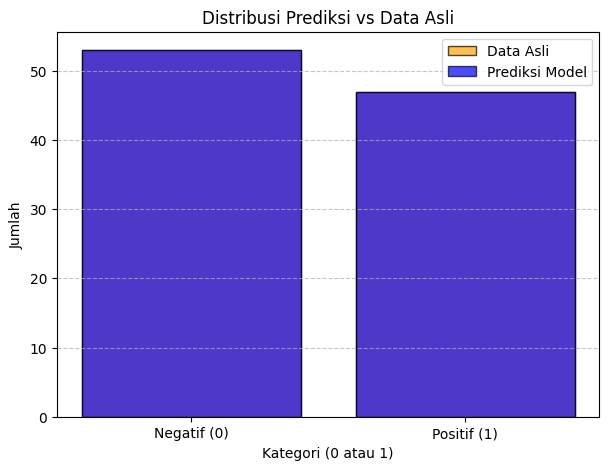

In [11]:
plt.figure(figsize=(7, 5))
plt.hist(y_test.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Data Asli", color="orange", edgecolor="black", rwidth=0.8)
plt.hist(y_pred.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Prediksi Model", color="blue", edgecolor="black", rwidth=0.8)
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.xticks([0, 1], ["Negatif (0)", "Positif (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Hasil Analisis Output:
Model klasifikasi ini cukup akurat karena prediksi model hampir sama dengan data asli untuk kategori Negatif (0) dan Positif (1). Namun, ada sedikit selisih pada kategori Positif, yang menunjukkan masih ada error. Model bisa ditingkatkan dengan tuning hyperparameter atau perbaikan dataset.

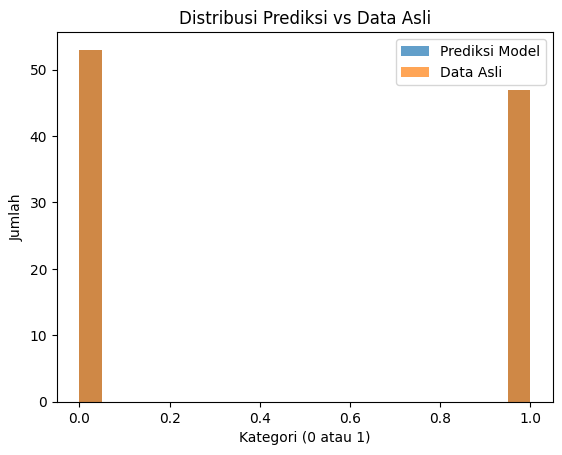

In [12]:
plt.hist(y_pred.numpy(), bins=20, alpha=0.7, label="Prediksi Model")
plt.hist(y_test.numpy(), bins=20, alpha=0.7, label="Data Asli")
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.show()